In [ ]:
!pip install kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d rishavdash/retail-demand-forecasting-dataset

Dataset URL: https://www.kaggle.com/datasets/rishavdash/retail-demand-forecasting-dataset
License(s): ODbL-1.0
  0% 0.00/1.76M [00:00<?, ?B/s]
100% 1.76M/1.76M [00:00<00:00, 75.9MB/s]


In [ ]:
from zipfile import ZipFile
dataset='/content/retail-demand-forecasting-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv("Retail_Dataset2.csv")

In [ ]:
df.head(5)

,Product_id,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Open,Promo,StateHoliday,SchoolHoliday,Petrol_price
0,786725,Product_0033,Whse_S,Category_005,01/03/2016,16000,1,0,0,0,91
1,786743,Product_1825,Whse_S,Category_006,01/03/2016,50000,1,0,0,0,85
2,786967,Product_0551,Whse_S,Category_030,01/03/2016,3000,1,0,0,0,85
3,786856,Product_0556,Whse_S,Category_030,01/03/2016,1000,1,0,0,0,93
4,899538,Product_1844,Whse_A,Category_018,01/03/2016,7,1,0,0,0,95


In [ ]:
df.shape

(169211, 11)

In [ ]:
df["Product_Category"].value_counts()

,count
Product_Category,
Category_019,76640
Category_005,17831
Category_001,17599
Category_007,12643
Category_021,7890
Category_006,5877
Category_028,4972
Category_015,3672
Category_011,3255


<ipython-input-9-ae39674884e5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Product_Category",data=df,palette="hot")


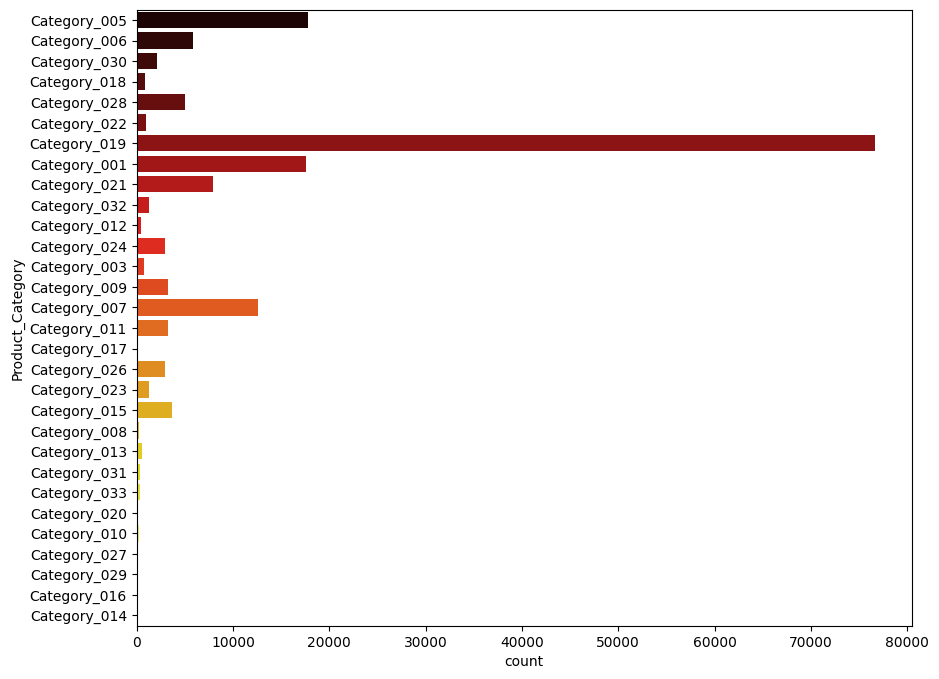

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(y="Product_Category",data=df,palette="hot")
plt.show()

In [ ]:
df["Product_Code"].value_counts()

,count
Product_Code,
Product_1359,2607
Product_1378,1674
Product_1295,1627
Product_1382,1467
Product_1453,1450
...,...
Product_1405,1
Product_0428,1
Product_1698,1


<ipython-input-11-b83892b222f8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Product_Code",data=df[: 30],palette="summer")


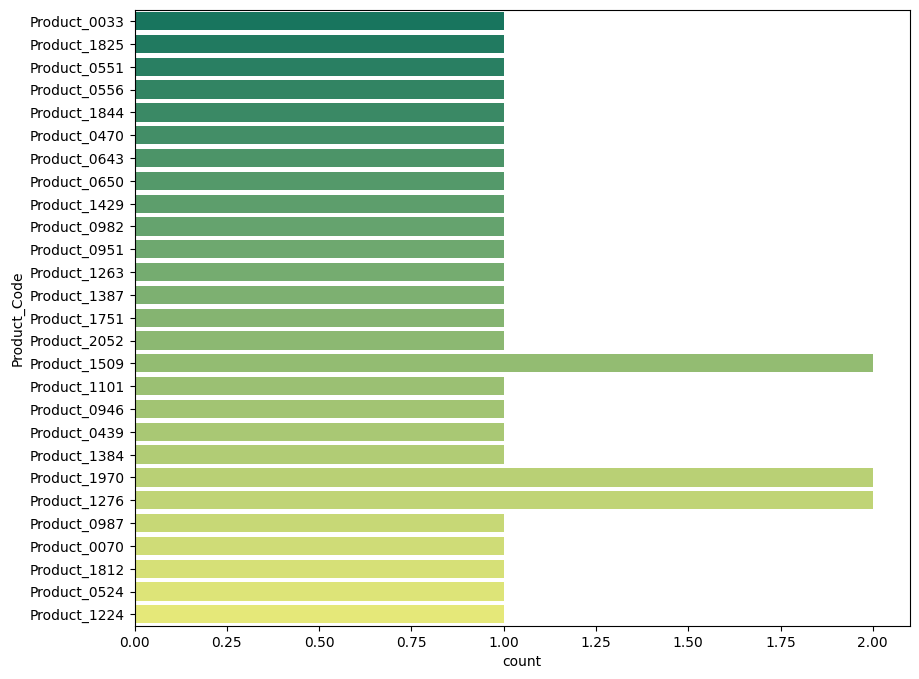

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(y="Product_Code",data=df[: 30],palette="summer")
plt.show()

In [ ]:
df["Warehouse"].value_counts()

,count
Warehouse,
Whse_J,131102
Whse_A,23157
Whse_C,9142
Whse_S,5810


<ipython-input-13-5951811f54a1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Warehouse",data=df,palette="winter")


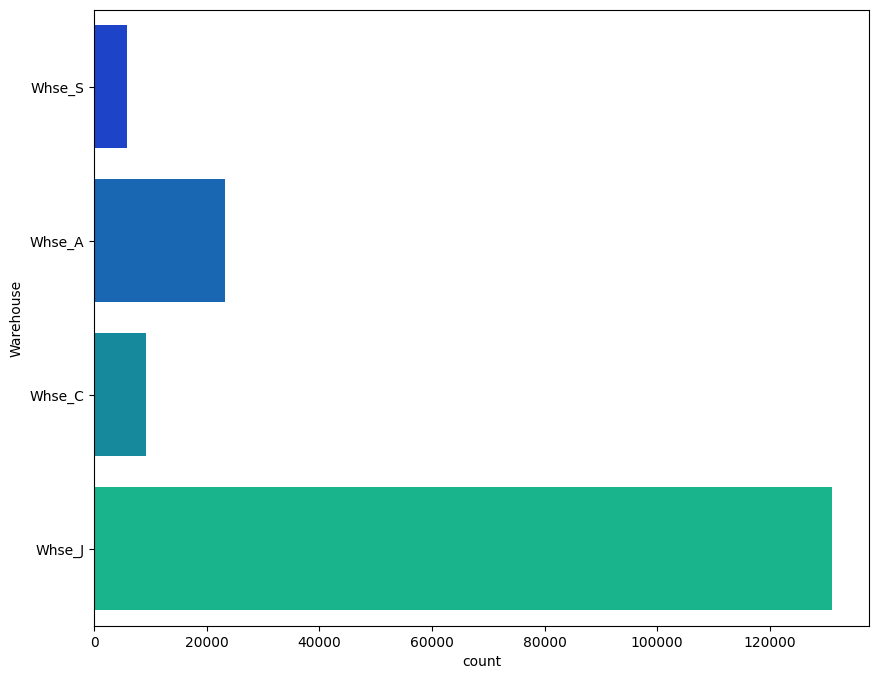

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(y="Warehouse",data=df,palette="winter")
plt.show()

In [ ]:
df["Product_id"].value_counts()

,count
Product_id,
786725,1
877163,1
965885,1
1014132,1
1044430,1
...,...
942356,1
868382,1
868674,1


In [ ]:
# predicting Order_Demand for given product code based on
# StateHoliday, Open, Day_Type, SchoolHoliday

In [ ]:
df.isnull().sum()

,0
Product_id,0
Product_Code,0
Warehouse,0
Product_Category,0
Date,0
Order_Demand,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


In [ ]:
df["Date"]=pd.to_datetime(df["Date"]) #, format='%d/%m/%Y'

In [ ]:
# df1 = df.groupby(['Product_Code', 'Date'], as_index=False).agg({
#     'Order_Demand': 'sum',
#     'Open': 'first',
#     'Promo': 'first',
#     'StateHoliday': 'first',
#     'SchoolHoliday': 'first',
#     'Petrol_price': 'first'
# })

In [ ]:
# df1.head()

In [ ]:
# Product_id	Product_Code	Warehouse	Product_Category	Date	Order_Demand	Open	Promo	StateHoliday	SchoolHoliday	Petrol_price	Day_Type	Year	Month	Day
# 0	786725	Product_0033	Whse_S	Category_005	2016-01-03	16000	1	0	0	0	91	1	2016	1	3
# 1	786743	Product_1825	Whse_S	Category_006	2016-01-03	50000	1	0	0	0	85	1	2016	1	3
# 2	786967	Product_0551	Whse_S	Category_030	2016-01-03	3000	1	0	0	0	85	1	2016	1	3
# 3	786856	Product_0556	Whse_S	Category_030	2016-01-03	1000	1	0	0	0	93	1	2016	1	3
# 4	899538	Product_1844	Whse_A	Category_018	2016-01-03	7	1	0	0	0	95	1	2016	1	3

# preprocess this by reducing it to only one row of order demand per product per date. so, to do this, add the order demand of the same product on the same date

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day_Type'] = df['Date'].dt.dayofweek.apply(lambda x: '1' if x >= 5 else '0')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [ ]:
state_holiday_mapping = {'0': 0, 'a': 1, 'b': 2}
df['StateHoliday'] = df['StateHoliday'].map(state_holiday_mapping)
df['Day_Type'] = df['Day_Type'].astype(int)

In [ ]:
df1 = df.groupby(['Product_Code', 'Month', 'Year'], as_index=False).agg({
    'Order_Demand': 'sum',
    'Open': 'first',
    'StateHoliday': 'first',
    'SchoolHoliday': 'first',
    'Day_Type': 'first',
    'Petrol_price': 'mean'
})

df1 = df1.reset_index(drop=True)

In [ ]:
df1.head(20)

,Product_Code,Month,Year,Order_Demand,Open,StateHoliday,SchoolHoliday,Day_Type,Petrol_price
0,Product_0001,1,2016,2100,1,0,0,0,88.000000
1,Product_0001,2,2016,6300,1,0,0,0,91.800000
2,Product_0001,3,2016,9300,0,0,0,0,88.769231
3,Product_0001,4,2016,3400,1,0,0,0,86.000000
4,Product_0001,5,2016,16900,1,0,1,0,88.750000
5,Product_0001,6,2016,5300,1,0,0,0,89.750000
6,Product_0001,7,2016,9300,1,0,0,0,87.750000
7,Product_0001,8,2016,17500,1,0,0,0,88.181818
8,Product_0001,9,2016,3300,1,0,0,0,87.428571
9,Product_0001,10,2016,2100,1,0,0,0,88.714286


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1['Petrol_price_normalized_minmax'] = scaler.fit_transform(df1[['Petrol_price']])

print(df1[['Product_Code', 'Month', 'Year', 'Petrol_price', 'Petrol_price_normalized_minmax']])


       Product_Code  Month  Year  Petrol_price  Petrol_price_normalized_minmax
0      Product_0001      1  2016     88.000000                        0.500000
1      Product_0001      2  2016     91.800000                        0.737500
2      Product_0001      3  2016     88.769231                        0.548077
3      Product_0001      4  2016     86.000000                        0.375000
4      Product_0001      5  2016     88.750000                        0.546875
...             ...    ...   ...           ...                             ...
19766  Product_2172      6  2016     90.000000                        0.625000
19767  Product_2172      7  2016     89.333333                        0.583333
19768  Product_2172      8  2016     90.500000                        0.656250
19769  Product_2172      9  2016     87.333333                        0.458333
19770  Product_2172     10  2016     88.500000                        0.531250

[19771 rows x 5 columns]


In [ ]:
# Product_Category, Open, StateHoliday,	SchoolHoliday, Month
# Open,	Promo,	StateHoliday,	SchoolHoliday,	Petrol_price,	Day_Type,	Year,	Month

In [ ]:
# X = df1[['Product_Code', 'Open', 'StateHoliday', 'SchoolHoliday',	'Day_Type','Year']]
# y = df1['Order_Demand']

# Mean Squared Error: 7187380624.769519
# R-squared: 0.894360406705973

DECISION TREE REGRESSOR

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import numpy as np

le = LabelEncoder()
df1['Product_Code'] = le.fit_transform(df1['Product_Code'])

X = df1[['Product_Code', 'Open', 'StateHoliday', 'SchoolHoliday', 'Day_Type', 'Year']]
y = df1['Order_Demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 14792.607204462905
Mean Squared Error (MSE): 7187380624.769519
Root Mean Squared Error (RMSE): 84778.4207494426
R² Score: 0.894360406705973


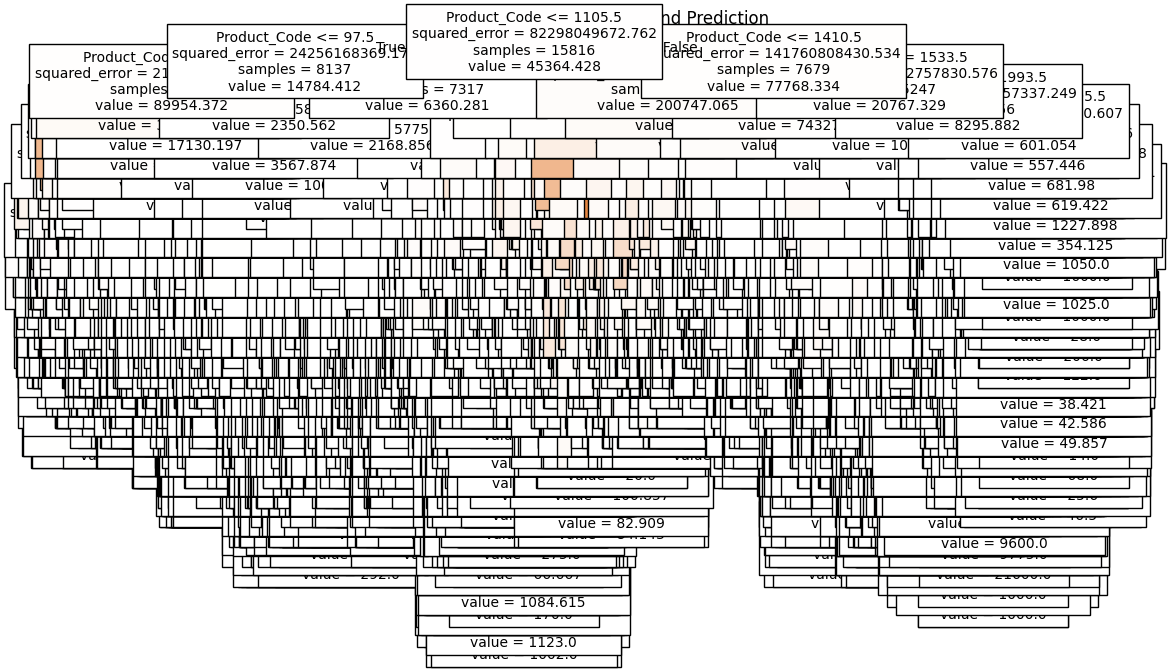

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, fontsize=10)
plt.title("Decision Tree for Order Demand Prediction")
plt.show()

In [ ]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.svm import SVR
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.preprocessing import OneHotEncoder

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
import xgboost as xgb


in the initial dataset, there are about  169211 rows, with each product code repeated atleast 20 times. i want to take an average of the order demand and reduce the rows to maybe 2117 where the different products average demand is listed and use this new dataset for the SVR prediction

In [ ]:
le_category = LabelEncoder()
df['Product_Category'] = le_category.fit_transform(df['Product_Category'])

# df = df.drop(['Product_Code', 'Warehouse', 'Date'], axis=1)
le_product_code = LabelEncoder()
df['Product_Code'] = le_product_code.fit_transform(df['Product_Code'])

le_stateholiday = LabelEncoder()
df['StateHoliday'] = le_stateholiday.fit_transform(df['StateHoliday'])
df.head()
df_selected = df[['Product_Code', 'Open','StateHoliday', 'Day_Type', 'Month']]
X = df_selected
y = df['Order_Demand']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.dtypes

,0
Product_Code,int64
Open,int64
StateHoliday,int64
SchoolHoliday,int64
Day_Type,int64
Year,int32


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# # Create DMatrix objects (for XGBoost training)
# dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
# dval = xgb.DMatrix(X_val, label=y_val, enable_categorical=True)
# dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

# # Define model parameters
# params = {
#     'objective': 'reg:squarederror',  # Regression task using squared error loss
#     'eval_metric': 'rmse',            # Primary evaluation metric: Root Mean Squared Error
#     'max_depth': 5,                   # Maximum depth of trees
#     'learning_rate': 0.05,            # Learning rate (step size)
#     'n_estimators': 200,             # Number of boosting rounds (trees)
# }

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model = xgb.XGBRegressor(
    objective='reg:squarederror',
    eval_metric='rmse',
    max_depth=5,
    learning_rate=0.05,
    n_estimators=200
)

model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=True
)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Squared Error (MSE): {mse}')


[0]	validation_0-rmse:27767.61906
[1]	validation_0-rmse:27739.14691
[2]	validation_0-rmse:27682.97183
[3]	validation_0-rmse:27659.60282
[4]	validation_0-rmse:27612.35068
[5]	validation_0-rmse:27596.04146
[6]	validation_0-rmse:27582.28764
[7]	validation_0-rmse:27544.47175
[8]	validation_0-rmse:27531.52388
[9]	validation_0-rmse:27477.29402
[10]	validation_0-rmse:27440.00642
[11]	validation_0-rmse:27402.98557
[12]	validation_0-rmse:27391.21664
[13]	validation_0-rmse:27381.35894
[14]	validation_0-rmse:27348.67804
[15]	validation_0-rmse:27340.98470
[16]	validation_0-rmse:27310.29253
[17]	validation_0-rmse:27284.31320
[18]	validation_0-rmse:27276.47466
[19]	validation_0-rmse:27253.52383
[20]	validation_0-rmse:27247.08337
[21]	validation_0-rmse:27226.82993
[22]	validation_0-rmse:27217.19872
[23]	validation_0-rmse:27207.72526
[24]	validation_0-rmse:27200.61532
[25]	validation_0-rmse:27184.73594
[26]	validation_0-rmse:27182.00982
[27]	validation_0-rmse:27167.99993
[28]	validation_0-rmse:27161.8

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100,200,300, 400, 500]
}

grid_search = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror'),
                           param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best RMSE:", -grid_search.best_score_)
# Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
# Best RMSE: 29559.04761132322

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

X = df1[['Product_Code', 'Open', 'StateHoliday', 'SchoolHoliday', 'Day_Type', 'Year', 'Month']]
y = df1['Order_Demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_model = SVR(kernel='linear')
svr_model.fit(X_train_scaled, y_train)

y_pred = svr_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("Predictions vs Actuals:")
print(comparison)


Mean Squared Error: 103701150030.9523
Predictions vs Actuals:
       Actual    Predicted
13478    1085   512.483939
3579     5000  1263.350025
17627     300   188.873423
14293    2200   477.489543
1337   261000  1444.151288
...       ...          ...
4189    22200  1243.289506
16697     140   249.386875
15044     200   439.070240
7780      125   956.688263
1336   368000  1438.080759

[3955 rows x 2 columns]


In [ ]:
# df1 = pd.get_dummies(df, columns=['Product_Code', 'Warehouse', 'Product_Category'], drop_first=True)
# df1.head()

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# df2=df.copy()
# # Initialize LabelEncoders
# label_encoders = {}
# for column in ['Product_Code', 'Warehouse', 'Product_Category']:
#     le = LabelEncoder()
#     df2[column] = le.fit_transform(df2[column])
#     label_encoders[column] = le

use df2

In [ ]:
# df2.head()

In [ ]:
unique_classes = {}
for column in ['Product_Code', 'Warehouse', 'Product_Category']:
    unique_classes[column] = df[column].nunique()

for column, count in unique_classes.items():
    print(f"{column}: {count} unique classes")

Product_Code: 2117 unique classes
Warehouse: 4 unique classes
Product_Category: 30 unique classes


In [ ]:
# #1 weekend, 0 weekday
# df2['Day_Type'] = df['Date'].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)

In [ ]:
# state_holiday_mapping = {'0': 0, 'a': 1, 'b': 2}  # Example mapping
# df2['StateHoliday'] = df2['StateHoliday'].map(state_holiday_mapping)

In [ ]:
# df2.head()

Support Vector Regression (SVR)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.preprocessing import LabelEncoder
# df2=df.copy()
# # Initialize LabelEncoders
# label_encoders = {}
#  for column in ['', 'Warehouse', 'Product_Category']:
le = LabelEncoder()
df1['Product_Code'] = le.fit_transform(df1['Product_Code'])
#     label_encoders[column] = le
X = df1[['Product_Code', 'Open', 'StateHoliday', 'SchoolHoliday',	'Day_Type','Year','Month']]
y = df1['Order_Demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_scaled_fit = scaler.fit_transform(X_test)


In [ ]:
# print(X_train.shape)
# print(y_train.shape)
# print(X_scaled.shape)
# print(X_scaled_fit.shape)

In [ ]:
print(X.dtypes)


Product_Code     int64
Open             int64
StateHoliday     int64
SchoolHoliday    int64
Day_Type         int64
Year             int32
Month            int32
dtype: object


In [ ]:
for column in X.columns:
    print(f"Unique values in {column}: {X[column].unique()}")


Unique values in Product_Code: [   0    1    2 ... 2114 2115 2116]
Unique values in Open: [1 0]
Unique values in StateHoliday: [0 1 2]
Unique values in SchoolHoliday: [0 1]
Unique values in Day_Type: [0 1]
Unique values in Year: [2016]
Unique values in Month: [ 1  2  3  4  5  6  7  8  9 10 11]


In [ ]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error (MAE): 43018.49750475887
Mean Squared Error (MSE): 69846215978.8293
Root Mean Squared Error (RMSE): 264284.3468289965
R^2 Score: -0.026594559873737378


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

data = df.drop(columns=['Date', 'Product_id'])

X = data.drop(columns=['Order_Demand'])
y = data['Order_Demand']

categorical_cols = ['Product_Code', 'Warehouse', 'Product_Category', 'StateHoliday', 'Open', 'Promo', 'Day_Type', 'SchoolHoliday']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('num', StandardScaler(), ['Year', 'Month', 'Day', 'Petrol_price'])
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('svr', SVR(kernel='rbf', C=1.0, epsilon=0.2))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²) Score: {r2}")


In [ ]:
mean_order_demand = df.groupby('Product_Code')['Order_Demand'].mean().reset_index()
mean_order_demand = mean_order_demand.rename(columns={'Order_Demand': 'Product_Mean_Demand'})

df = df.merge(mean_order_demand, on='Product_Code', how='left')

df['Product_Code'] = pd.factorize(df['Product_Code'])[0]
df['Product_Category'] = pd.factorize(df['Product_Category'])[0]
df['Warehouse'] = pd.factorize(df['Warehouse'])[0]

X = df[['Product_Code', 'Petrol_price', 'Day_Type', 'Year', 'Month', 'Product_Mean_Demand']]
y = df['Order_Demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train_scaled.ravel())

y_pred_scaled = svr_model.predict(X_test_scaled)

y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1))

rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 28214.05092054095
